## Table of Contents

### 1. Importing libraries and data
### 2. Time series analysis - decomposition
### 3. Testing for stationarity
### 4. Stationarizing the data

# 01. Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from datetime import datetime
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
# Define path
path = r'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/College Cost Analysis'

In [3]:
# Check output
path

'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/College Cost Analysis'

In [4]:
# Import data
data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'nyu_sat_time_series.pkl'))

In [5]:
# Check output
data

,SAT_AVG
DATE,
2001-09-01,1321.0
2002-09-01,1310.0
2003-09-01,1310.0
2004-09-01,1314.0
2005-09-01,1328.0
2006-09-01,1309.0
2007-09-01,1333.0
2008-09-01,1342.0
2009-09-01,1317.0


In [6]:
# Check shape
data.shape

(18, 1)

In [7]:
# Check column types
data.columns

Index(['SAT_AVG'], dtype='object')

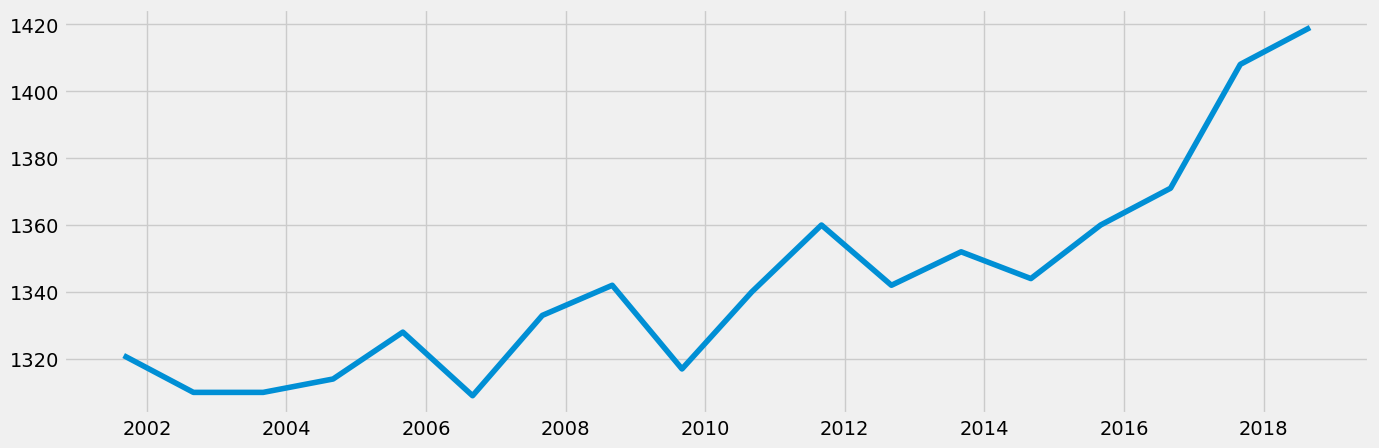

In [8]:
# Plot the data
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(data)

In [9]:
# Reset index
data.reset_index(inplace = True)

In [10]:
# Create datetime column from DATE
data['datetime'] = pd.to_datetime(data['DATE'])

In [11]:
# Set datetime as index
data = data.set_index('datetime')

In [12]:
# Drop DATE column
data.drop(['DATE'], axis = 1, inplace = True)

In [13]:
# Check output
data

,SAT_AVG
datetime,
2001-09-01,1321.0
2002-09-01,1310.0
2003-09-01,1310.0
2004-09-01,1314.0
2005-09-01,1328.0
2006-09-01,1309.0
2007-09-01,1333.0
2008-09-01,1342.0
2009-09-01,1317.0


# 02. Time series analysis - decomposition

In [14]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data, model = 'additive')

In [15]:
# Define fixed size for special charts
rcParams['figure.figsize'] = 18,7

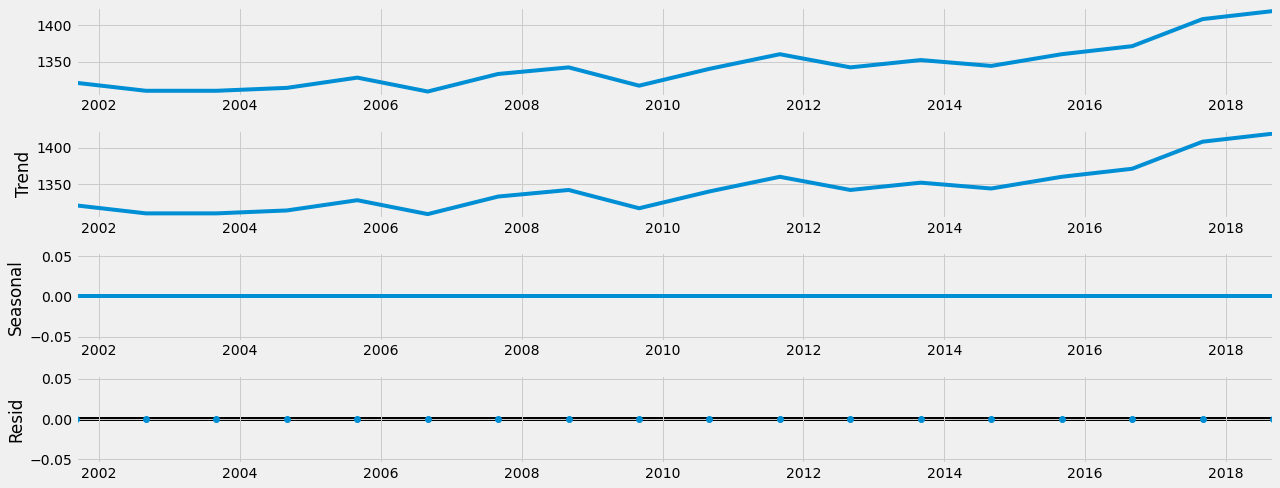

In [16]:
# Plot the components
decomposition.plot()
plt.show()

Trend: There seems to be a dominant trend - the trend line is increasing here.
Seasonal: The flat line indicates there is no seasonality.
Noise/Residual: There doesn't appear to be any unexplained noise.

# 03. Testing for stationarity

In [17]:
# Define function for Dickey-Fuller stationarity test
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print (result)

In [18]:
# Apply to time series
dickey_fuller(data['SAT_AVG'])

Dickey-Fuller Stationarity Test:
Test Statistic                  1.010354
p-value                         0.994374
Number of Lags Used             7.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


Null hypothesis: A unit root (random jump that can't be explained by variation) is present.
At a 5% significance level, the critical value (-3.232950) is smaller than the test statistic (1.010354), so I can't reject the null hypothesis. This means there is a unit root in the data, and therefore it is non-stationary.

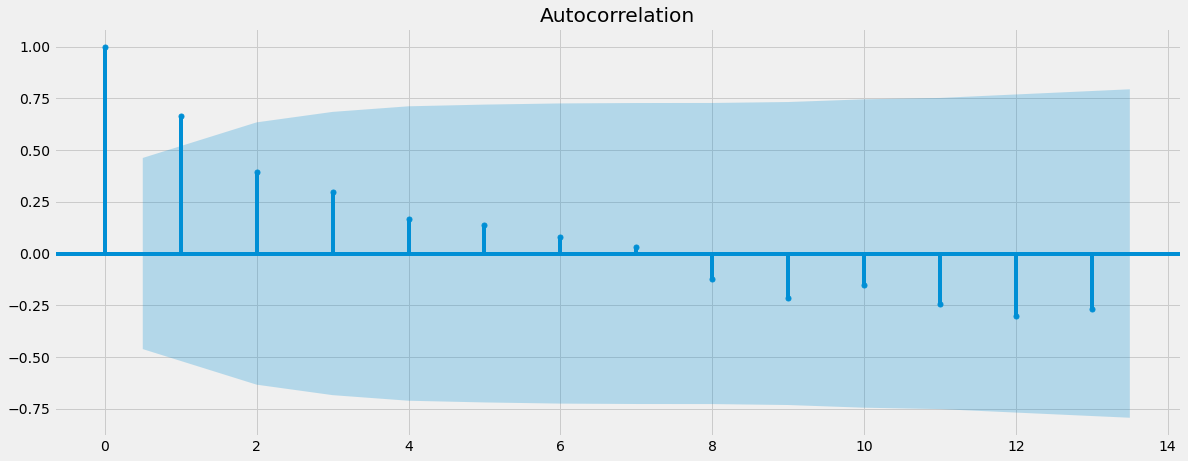

In [19]:
# Check the autocorrelations
plot_acf(data)
plt.show()

It appears as though the data is highly autocorrelated, again showing that the data is non-stationary.

# 04. Stationarizing the data

In [20]:
# Create new dataframe from differencing
data_diff = data - data.shift(1)

In [21]:
# Remove missing values as a result of differencing
data_diff.dropna(inplace = True)

In [22]:
# Check output
data_diff

,SAT_AVG
datetime,
2002-09-01,-11.0
2003-09-01,0.0
2004-09-01,4.0
2005-09-01,14.0
2006-09-01,-19.0
2007-09-01,24.0
2008-09-01,9.0
2009-09-01,-25.0
2010-09-01,23.0


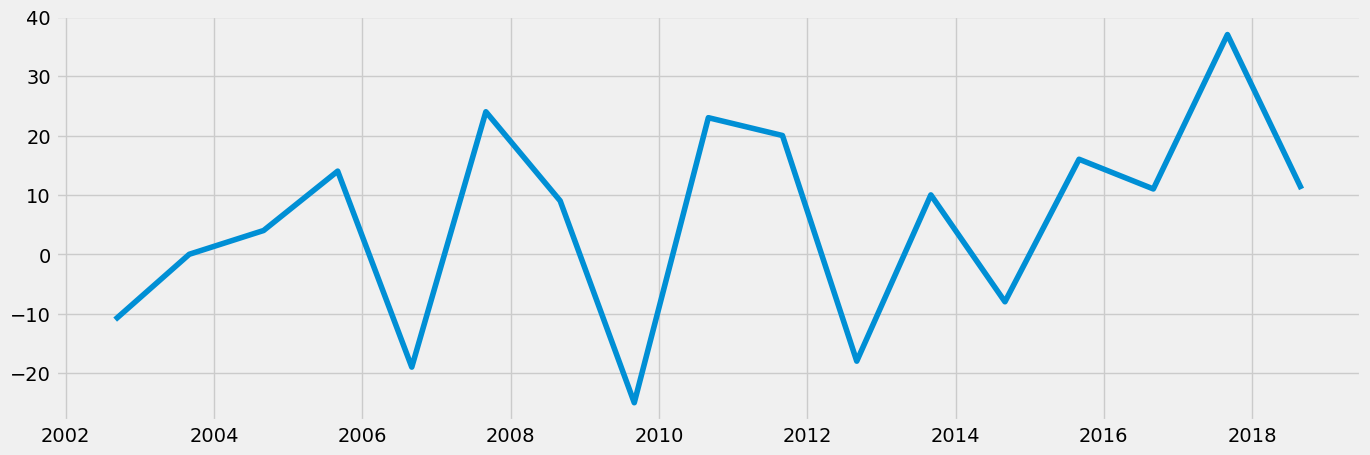

In [23]:
# Look at chart of new dataframe from differencing
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(data_diff)

In [24]:
# Perform Dickey-Fuller test on new data from differencing
dickey_fuller(data_diff)

Dickey-Fuller Stationarity Test:
Test Statistic                 -4.956758
p-value                         0.000027
Number of Lags Used             0.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


Null hypothesis: A unit root (random jump that can't be explained by variation) is present.
At a 5% significance level, the critical value (-3.068498) is larger than the test statistic (-4.956758), so I can reject the null hypothesis. This means there is no unit root in the data, and therefore it is stationary.

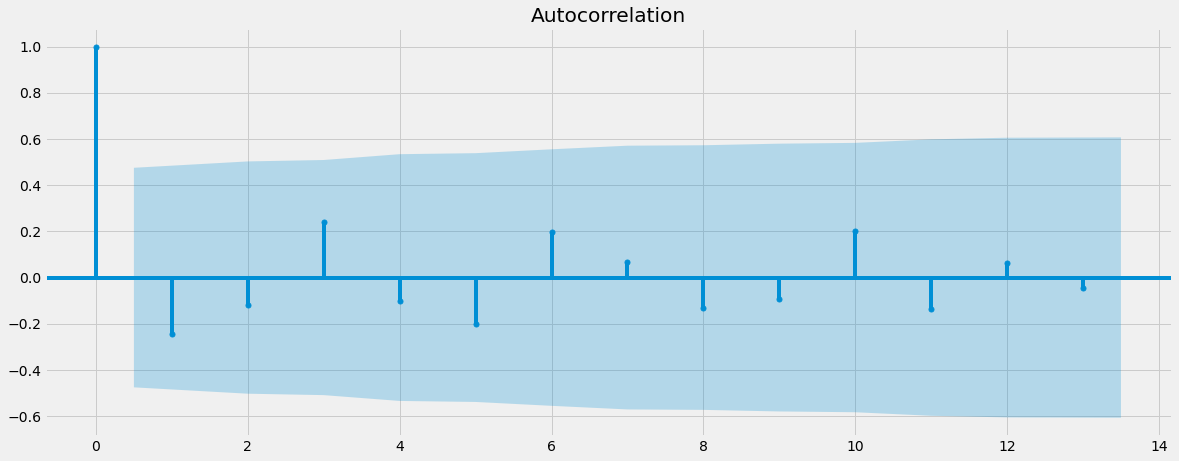

In [25]:
# Check the autocorrelations
plot_acf(data_diff)
plt.show()

The differenced data is still highly correlated with no improvement, so even though it passed the Dickey-Fuller test, it probably has weak stationarity.